In [1]:
import numpy as np
import pandas as pd
# Reading ratings file
ratings = pd.read_csv('data/ratings2.csv',  encoding='latin-1', usecols=['user_id', 'movie_id', 'rating', 'timestamp'])

# Reading users file
users = pd.read_csv('data/users.csv', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('data/movies.csv',  encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

In [2]:
merged_ratings = pd.merge(ratings, users, on='user_id')
male_ratings = merged_ratings[merged_ratings['gender'] == 'M']
female_ratings = merged_ratings[merged_ratings['gender'] == 'F']


In [4]:
male_movie_sums = male_ratings.groupby('movie_id')['rating'].sum()
male_popular_movies = male_movie_sums[male_movie_sums > 300]
male_popular_movies_with_title = pd.merge(male_popular_movies, movies, on='movie_id')
male_sorted_popular_movies = male_popular_movies_with_title.sort_values(
    by='rating', ascending=False)
male_top_20_movies = male_sorted_popular_movies.head(20)
print("the top 20 popular movies for male: ", male_top_20_movies['title'].tolist())

female_movie_sums = female_ratings.groupby('movie_id')['rating'].sum()
female_popular_movies = female_movie_sums[female_movie_sums > 300]
female_popular_movies_with_title = pd.merge(
    female_popular_movies, movies, on='movie_id')
female_sorted_popular_movies = female_popular_movies_with_title.sort_values(
    by='rating', ascending=False)
female_top_20_movies = female_sorted_popular_movies.head(20)
print("the top 20 popular movies for female: ",
      female_top_20_movies['title'].tolist())


the top 20 popular movies for male:  ['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)', 'Star Wars: Episode V - The Empire Strikes Back (1980)', 'Saving Private Ryan (1998)', 'Star Wars: Episode VI - Return of the Jedi (1983)', 'Matrix, The (1999)', 'Terminator 2: Judgment Day (1991)', 'Raiders of the Lost Ark (1981)', 'Silence of the Lambs, The (1991)', 'Braveheart (1995)', 'Jurassic Park (1993)', 'Godfather, The (1972)', 'Fargo (1996)', 'Sixth Sense, The (1999)', 'Back to the Future (1985)', "Schindler's List (1993)", 'Men in Black (1997)', 'L.A. Confidential (1997)', 'Shawshank Redemption, The (1994)', 'Terminator, The (1984)']
the top 20 popular movies for female:  ['American Beauty (1999)', 'Shakespeare in Love (1998)', 'Silence of the Lambs, The (1991)', 'Sixth Sense, The (1999)', 'Shawshank Redemption, The (1994)', "Schindler's List (1993)", 'Star Wars: Episode IV - A New Hope (1977)', 'Fargo (1996)', 'Princess Bride, The (1987)', 'Star Wars: Episode V - The

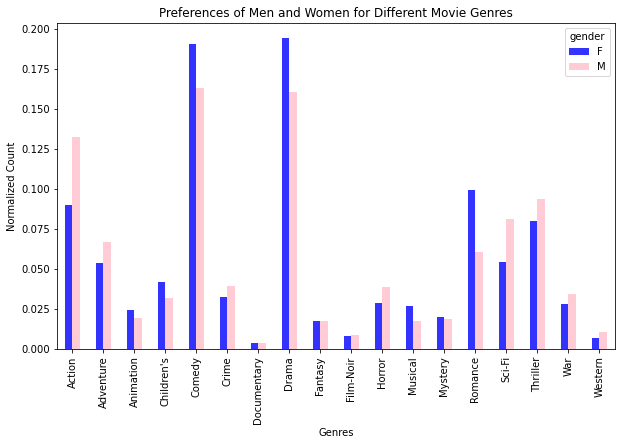

In [26]:
import matplotlib.pyplot as plt

movie_merged_ratings = pd.merge(merged_ratings, movies, on='movie_id')
movie_merged_ratings['genres'] = movie_merged_ratings['genres'].str.split('|')
movie_merged_ratings = movie_merged_ratings.explode('genres')
pivot_df = pd.pivot_table(movie_merged_ratings, index=['genres'], columns=[
                          'gender'], values='movie_id', aggfunc='count')
normalized_df = pivot_df.apply(lambda x: x / x.sum(), axis=0)
ax = normalized_df.plot(
    kind='bar', color=['blue', 'pink'], alpha=0.8, figsize=(10, 6))
ax.set_title('Preferences of Men and Women for Different Movie Genres')
ax.set_xlabel('Genres')
ax.set_ylabel('Normalized Count')
plt.show()


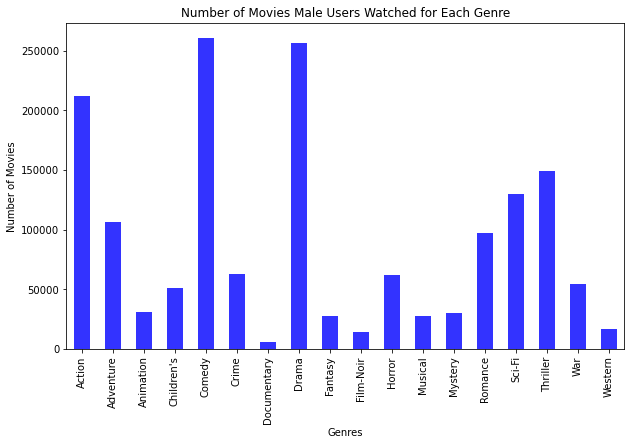

In [27]:
male_merged_ratings = movie_merged_ratings[movie_merged_ratings['gender'] == 'M']
male_genre_count = male_merged_ratings.groupby('genres')['movie_id'].count()
ax = male_genre_count.plot(kind='bar', figsize=(10, 6), color='blue', alpha=0.8)
ax.set_title('Number of Movies Male Users Watched for Each Genre')
ax.set_xlabel('Genres')
ax.set_ylabel('Number of Movies')
plt.show()

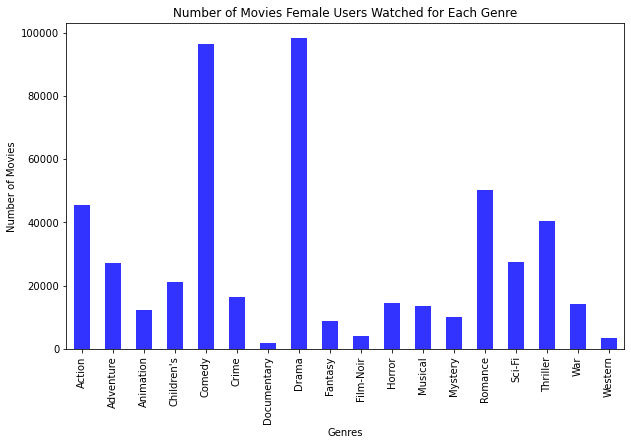

In [28]:
female_merged_ratings = movie_merged_ratings[movie_merged_ratings['gender'] == 'F']
female_genre_count = female_merged_ratings.groupby('genres')['movie_id'].count()
ax = female_genre_count.plot(
    kind='bar', figsize=(10, 6), color='blue', alpha=0.8)
ax.set_title('Number of Movies Female Users Watched for Each Genre')
ax.set_xlabel('Genres')
ax.set_ylabel('Number of Movies')
plt.show()
